## QR Algorithmus ohne Shifts

In [1]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
%matplotlib inline

#### qralg - Wendet den ungeshifteten QR Algorithmus auf eine obere Hessenbergmatrix an

In [2]:
def qralg(H, tol):
#Eingabe: Matrix H und die Toleranz für den Abbruch 
#Ausgabe: Matrix HH mit Eigenwerten auf der Diagonalen

    n = len(H[0])
    werteH = [abs(H[n-1][n-2])]
    #werteH = np.array([max(abs(np.diag(H,-1)))])

    while max(abs(np.diag(H,-1))) >= tol:
        Q,R = la.qr(H)
        H = R @ Q
        werteH.append(abs(H[n-1][n-2]))
        #werteH.append(max(abs(np.diag(H,-1))))
        
    return H, werteH  

#### findeeigenwerte - Findet mit Hilfe von qralg die Eigenwerte von A

In [3]:
def findeeigenwerte(A, tol=1e-10):
#Eingabe: Matrix A und die Toleranz für den Abbruch beim QR Algorithmus
#Ausgabe: Vektor ew mit Approximationen der Eigenwerte
    H = la.hessenberg(A)
    HH, werteH = qralg(H, tol)
    ew = np.diag(HH)
    
    return ew, werteH

#### Test der Implementation: Matrix mit reellen Eigenwerten

In [4]:
def bspMatrix(n):
    A = np.diag(np.arange(1,n+1))
    Q,R = la.qr(np.random.rand(n,n))
    A = np.conjugate(Q.T) @ A @ Q
    
    return A

Der bertragsgrößte Fehler der berechneten Eigenwerte beträgt 2.1198283399562403e-14.


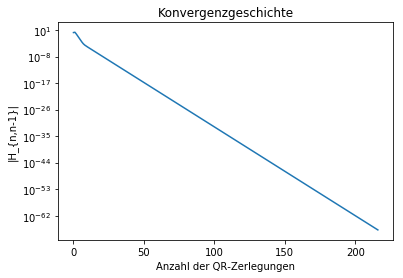

In [5]:
n = 10
A = bspMatrix(n)
ew, werteH = findeeigenwerte(A)
ew_ex = np.arange(1,n+1)
ew_ex = sorted(ew_ex, reverse = True)
print("Der bertragsgrößte Fehler der berechneten Eigenwerte beträgt "  + str(la.norm(ew-ew_ex)) + ".")
plt.semilogy(np.arange(len(werteH)), werteH)
plt.title("Konvergenzgeschichte")
plt.xlabel("Anzahl der QR-Zerlegungen")
plt.ylabel("|H_{n,n-1}|");

#### Hilbertmatrix

Der bertragsgrößte Fehler der berechneten Eigenwerte beträgt 5.399241942791318e-16.


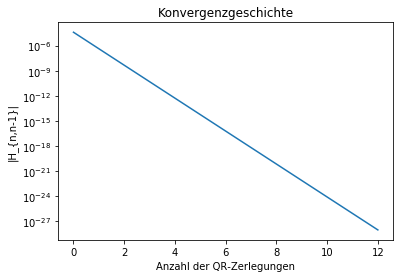

In [6]:
B = la.hilbert(5)
ew, werteH = findeeigenwerte(B)
ew_ex, ev_ex = la.eig(B)
ew_ex = sorted(ew_ex, reverse = True)
print("Der bertragsgrößte Fehler der berechneten Eigenwerte beträgt "  + str(la.norm(ew-ew_ex))+".")
plt.semilogy(np.arange(len(werteH)), werteH)
plt.title("Konvergenzgeschichte")
plt.xlabel("Anzahl der QR-Zerlegungen")
plt.ylabel("|H_{n,n-1}|");

#### Jordanblock mit Störung an der Stelle j_{n,1}

In [7]:
def bspJordaneps(n,lam,epsilon):
    J = lam*np.eye(n) + np.diag(np.ones(n-1),1)
    J[n-1][0] = epsilon
    ew, ev = la.eig(J)
    
    return ew

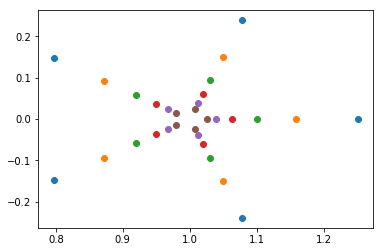

In [8]:
for k in range(3,9):
    ew = bspJordaneps(5,1,10**(-k))
    plt.plot(ew.real,ew.imag,'o');